In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.__version__

'0.11.0'

In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

## 구조화된 다중 플롯 그리드

### FacetGrid

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [4]:
sns.set(style='ticks')

#### g 객체에 sns.FacetGrid 해서 담아 놓은 후에

g.map 을 이용해서 histogram을 그리면 편핟. 

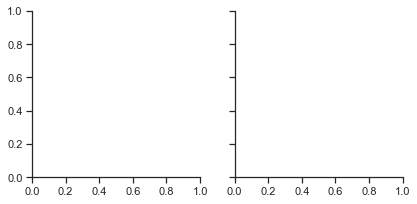

In [5]:
g = sns.FacetGrid(penguins, col='sex')

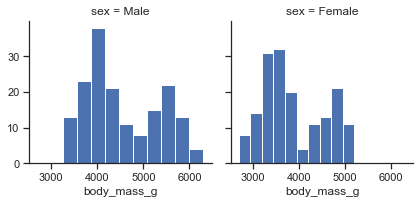

In [6]:
g.map(plt.hist, 'body_mass_g');

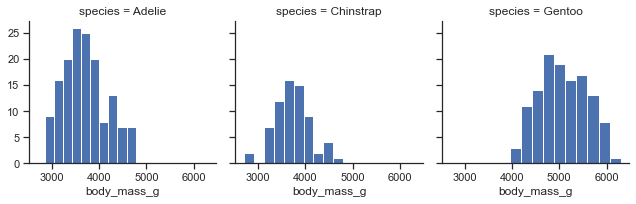

In [7]:
g = sns.FacetGrid(penguins, col='species')
g.map(plt.hist, 'body_mass_g');

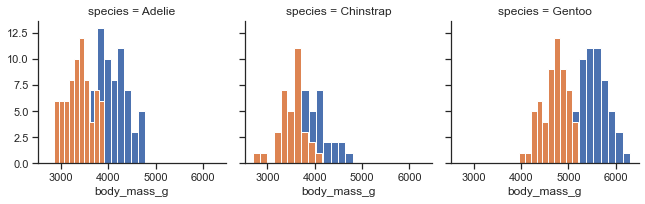

In [8]:
g = sns.FacetGrid(penguins, col='species', hue='sex')
g.map(plt.hist, 'body_mass_g');

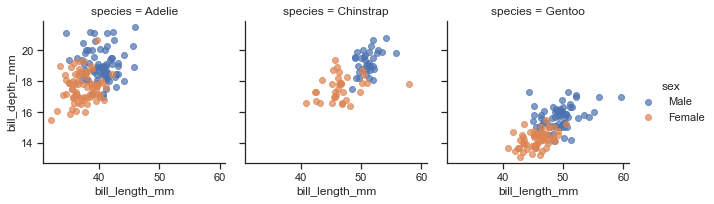

In [9]:
g = sns.FacetGrid(penguins, col='species', hue='sex')
g.map(plt.scatter, 'bill_length_mm', 'bill_depth_mm', alpha=.7)
g.add_legend();

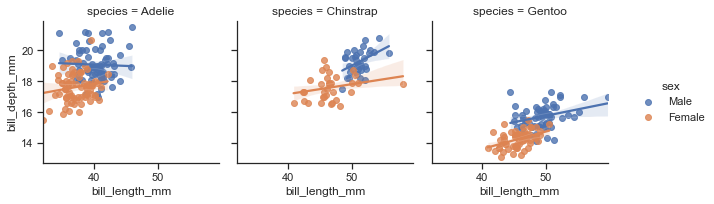

In [10]:
g = sns.FacetGrid(penguins, col='species', hue='sex', margin_titles=True)
g.map(sns.regplot, 'bill_length_mm', 'bill_depth_mm')
g.add_legend();

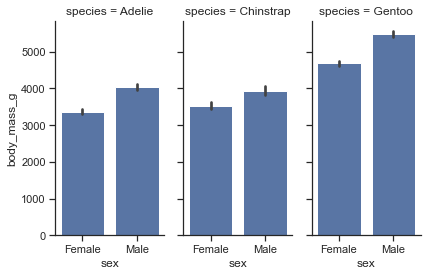

In [11]:
g = sns.FacetGrid(penguins, col='species', height=4, aspect=.5)
g.map(sns.barplot, 'sex', 'body_mass_g', order=['Female','Male'])
g.add_legend();

In [12]:
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


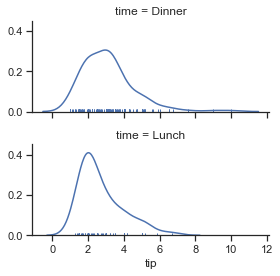

In [13]:
ordered_times = tips.time.value_counts().index
g = sns.FacetGrid(tips, row='time', row_order=ordered_times,
                  height=2, aspect=2)

g.map(sns.distplot, 'tip', hist=False, rug=True);

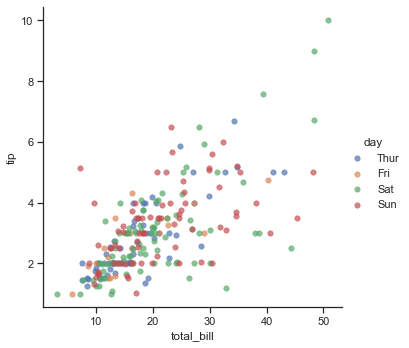

In [14]:
g = sns.FacetGrid(tips, hue='day', height=5)
g.map(plt.scatter, 'total_bill', 'tip', s=30, alpha=.7, linewidth=.5)
g.add_legend();

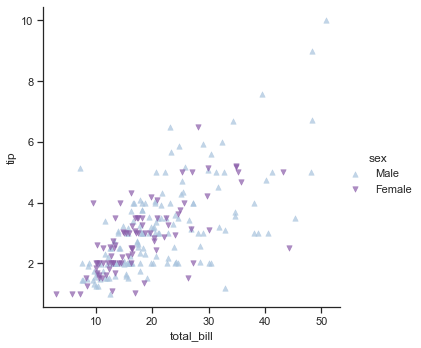

In [15]:
g = sns.FacetGrid(tips, hue='sex',palette='BuPu', 
                  hue_kws={'marker':["^","v"]}, height=5)
g.map(plt.scatter, 'total_bill', 'tip', s=30, alpha=.7, linewidth=.5)
g.add_legend();

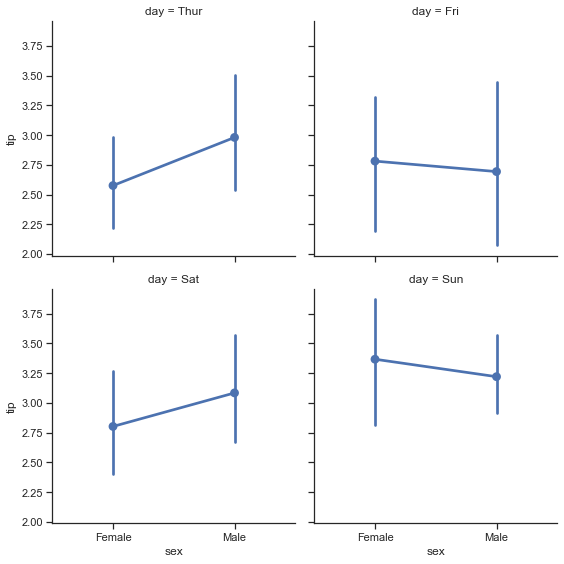

In [16]:
g = sns.FacetGrid(tips, col='day', col_wrap=2, height=4)
g.map(sns.pointplot, 'sex', 'tip', order=['Female', 'Male']);

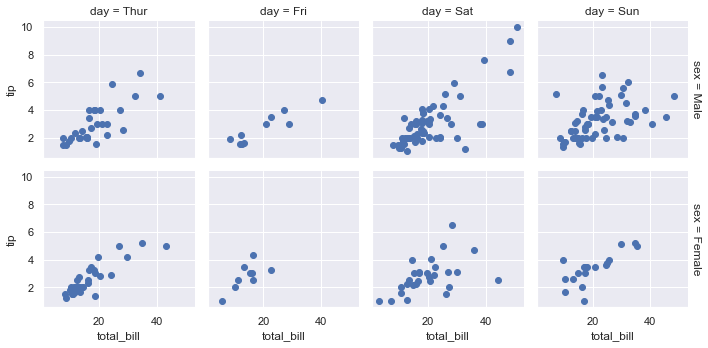

In [17]:
with sns.axes_style('darkgrid'):
    g = sns.FacetGrid(tips, row='sex', col='day', margin_titles=True, height=2.5)

g.map(plt.scatter, 'total_bill', 'tip')

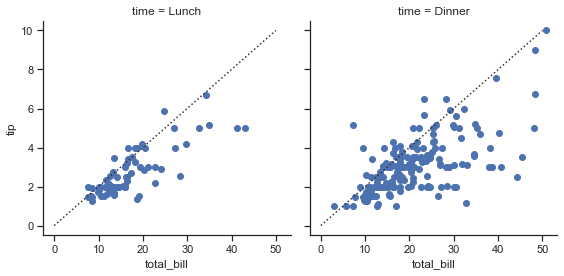

In [18]:
g = sns.FacetGrid(tips, col='time', margin_titles=True, height=4)
g.map(plt.scatter, 'total_bill', 'tip')
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c='.2', ls=':');

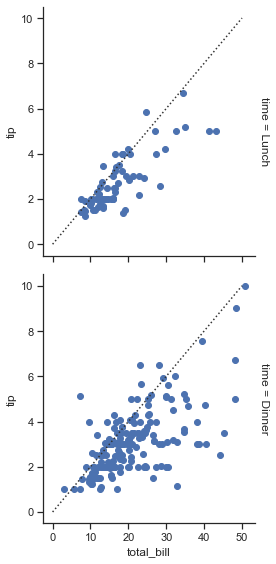

In [19]:
g = sns.FacetGrid(tips, row='time', margin_titles=True, height=4)
g.map(plt.scatter, 'total_bill', 'tip')
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c='.2', ls=':');

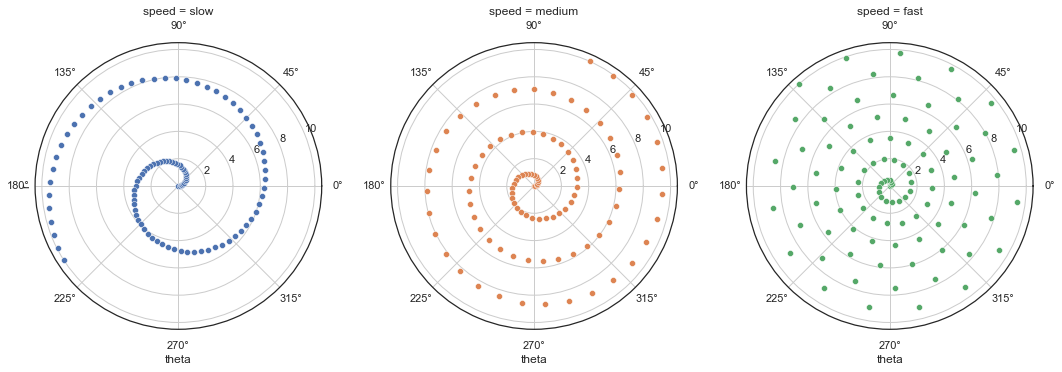

In [20]:
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r':r, 'slow':r, 'medium':2 * r, 'fast': 4 * r})
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

g = sns.FacetGrid(df, col='speed', hue='speed',
                  subplot_kws=dict(projection='polar'), height=5,
                  sharex=False, sharey=False, despine=False)

g.map(sns.scatterplot, "theta", "r");

### 커스텀 함수(Custom functions)

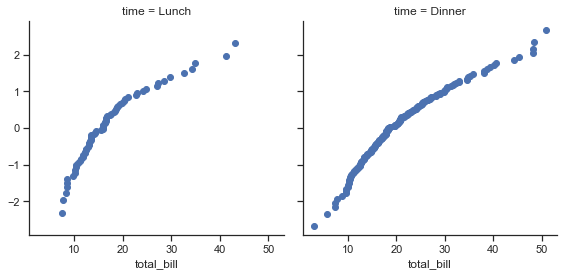

In [21]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col='time', height=4)
g.map(quantile_plot, 'total_bill');

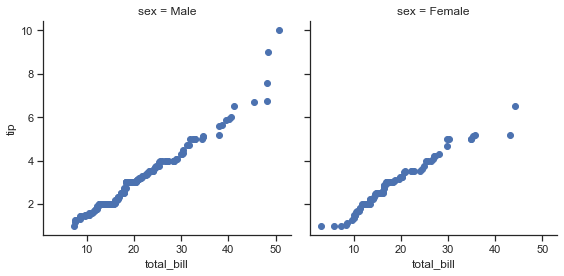

In [22]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col='sex', height=4)
g.map(qqplot, 'total_bill', 'tip');

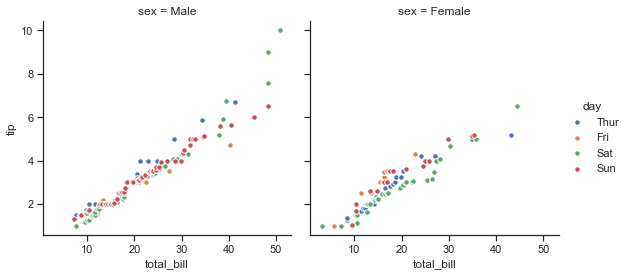

In [23]:
g = sns.FacetGrid(tips, col='sex',hue='day', height=4)
g.map(qqplot, 'total_bill', 'tip', s=30, edgecolor='w')
g.add_legend();

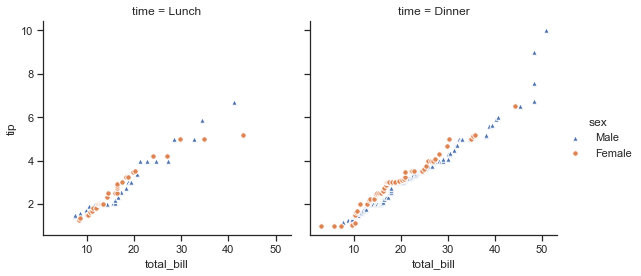

In [24]:
g = sns.FacetGrid(tips, col='time',hue='sex', height=4,
                  hue_kws={'marker':['^','o']})
g.map(qqplot, 'total_bill', 'tip', s=30, edgecolor='w')
g.add_legend();

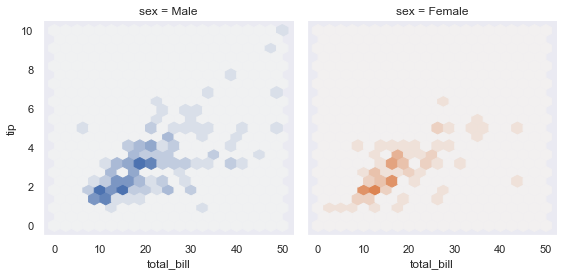

In [25]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=20, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue='sex', col='sex', height=4)
g.map(hexbin, 'total_bill', 'tip', extent=[0, 50, 0, 10]);

### 페어와이즈 데이터 관계(pairwise data relationships)

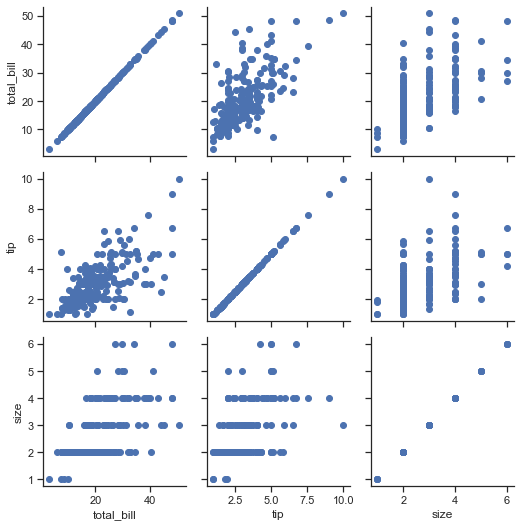

In [26]:
g = sns.PairGrid(tips) # 구조 생성
g.map(plt.scatter);

map_diag : 위치 지정해서 원하는 곳에 다른 형태의 그래프 그리기

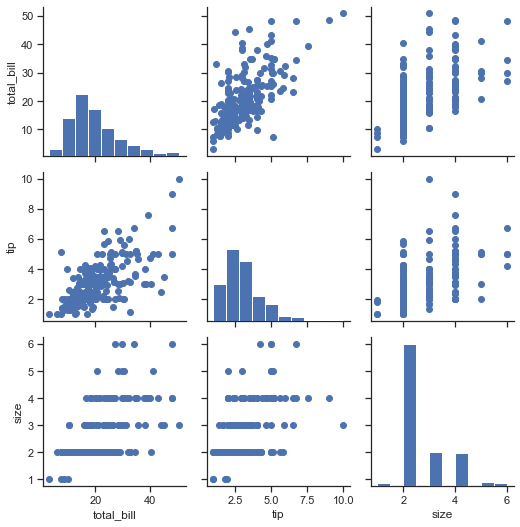

In [27]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist) # 대각선 부분 설정
g.map_offdiag(plt.scatter); # 다른쪽 설정

###### hue=

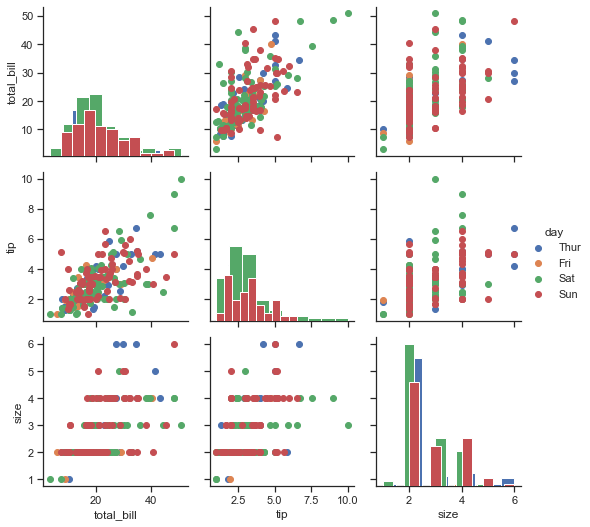

In [28]:
g = sns.PairGrid(tips, hue='day')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

######  원하는 변수만 넣기 vars=[]

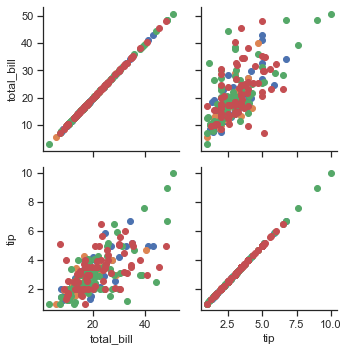

In [29]:
g = sns.PairGrid(tips, vars=['total_bill', 'tip'], hue='day')
g.map(plt.scatter);

###### 위치 지정하기 upper, lower, diag

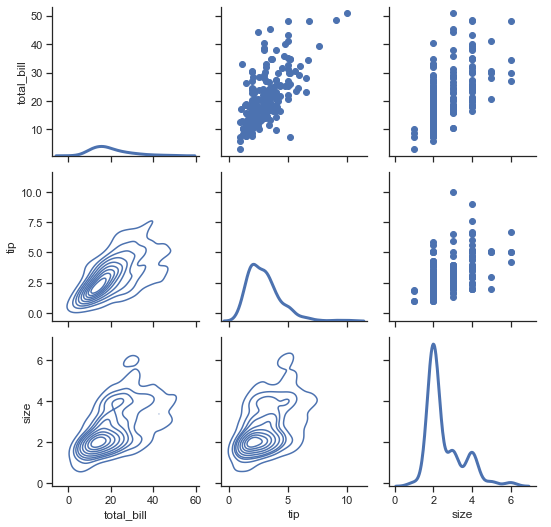

In [30]:
g = sns.PairGrid(tips)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.add_legend();

원하는 변수만 가져와서 그리기 y_vars, x_vars=

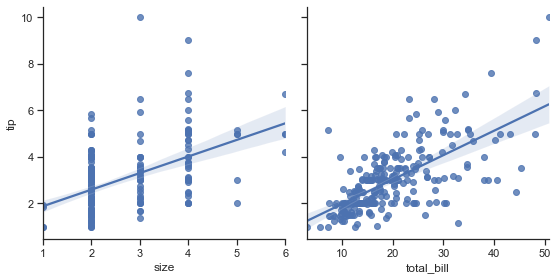

In [31]:
g = sns.PairGrid(tips, y_vars=['tip'],
                 x_vars=['size', 'total_bill'], height=4)
g.map(sns.regplot);

palette 지정

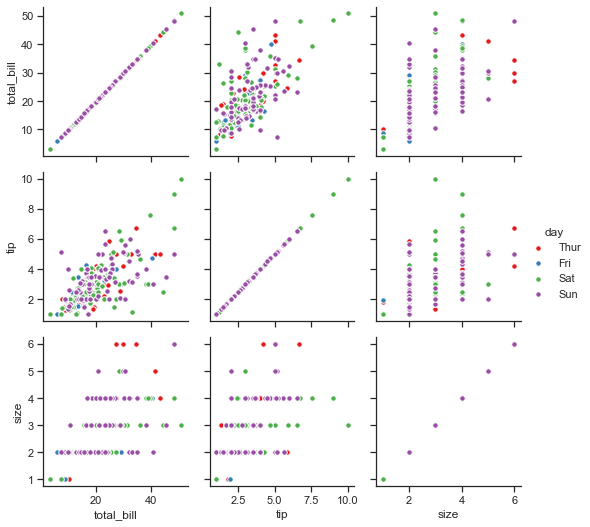

In [32]:
g = sns.PairGrid(tips, hue='day', palette='Set1')
g.map(plt.scatter, s=30, edgecolor='white')
g.add_legend();

pairplot Vs PairGrid

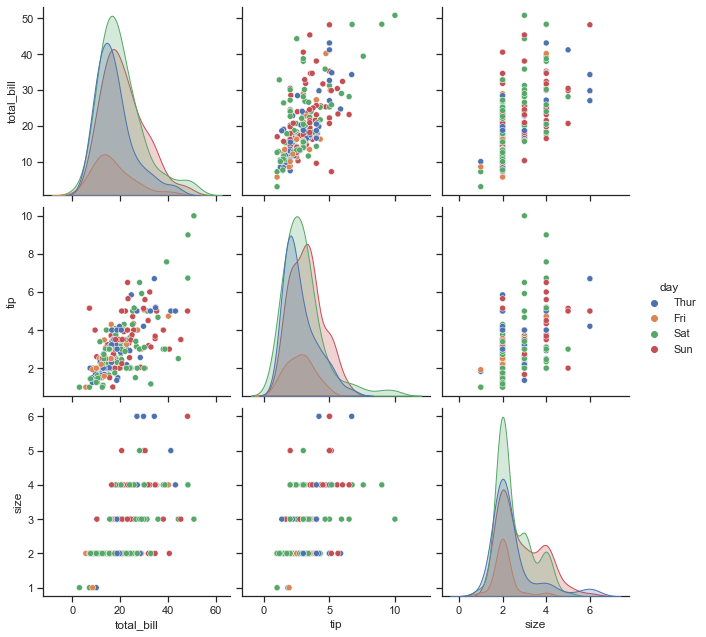

In [33]:
sns.pairplot(tips, hue='day', height=3);

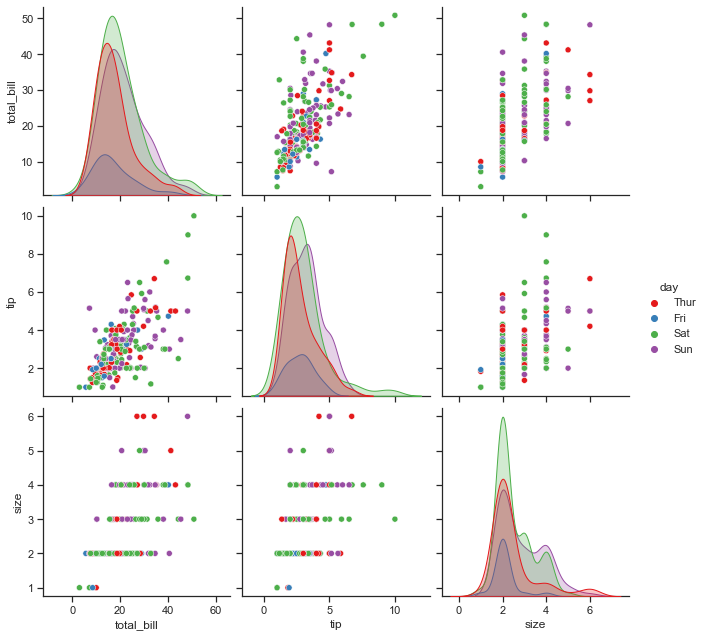

In [34]:
sns.pairplot(tips, hue='day', palette='Set1', diag_kind='kde', height=3);

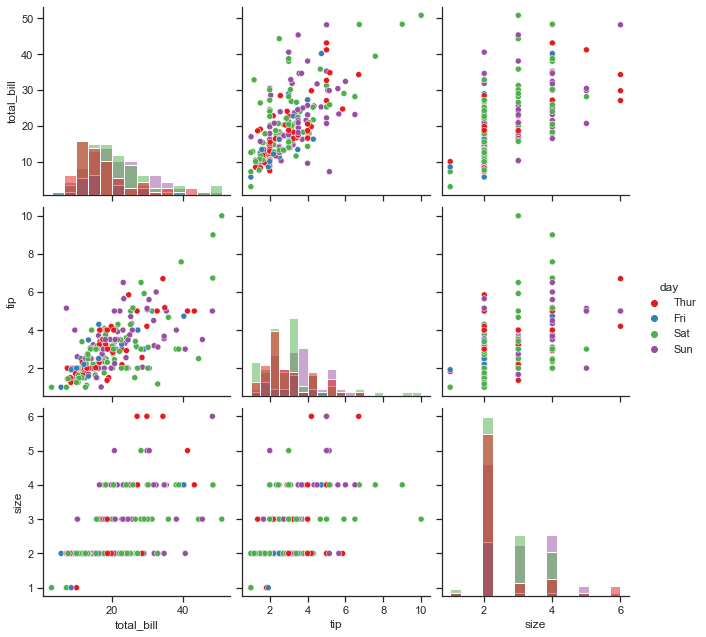

In [35]:
sns.pairplot(tips, hue='day', palette='Set1', diag_kind='hist', height=3);


참고문헌
* Seaborn, https://seaborn.pydata.orgl
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly
